In [1]:
#import csv from the dataset
import pandas as pd
import os

print(os.getcwd())


/Users/arc/Codes/DM-Lab/week2


In [2]:
df=pd.read_csv('../final.csv')
df.head()

,CASEID,YEAR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,DETNLF,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY
0,20100000001,2010,9,1,20,1,2,3,4,3,...,0,0,0,0,0,1,4,1,1,8
1,20100000002,2010,9,1,20,1,-9,1,1,-9,...,0,0,0,0,1,3,9,2,4,1
2,20100000003,2010,8,1,-9,1,4,3,1,-9,...,0,0,0,0,0,1,9,2,1,1
3,20100000004,2010,5,1,20,1,1,4,2,-9,...,0,0,0,0,0,3,19,1,1,8
4,20100000005,2010,9,1,20,1,2,2,4,3,...,0,0,0,0,0,2,15,2,1,3


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)


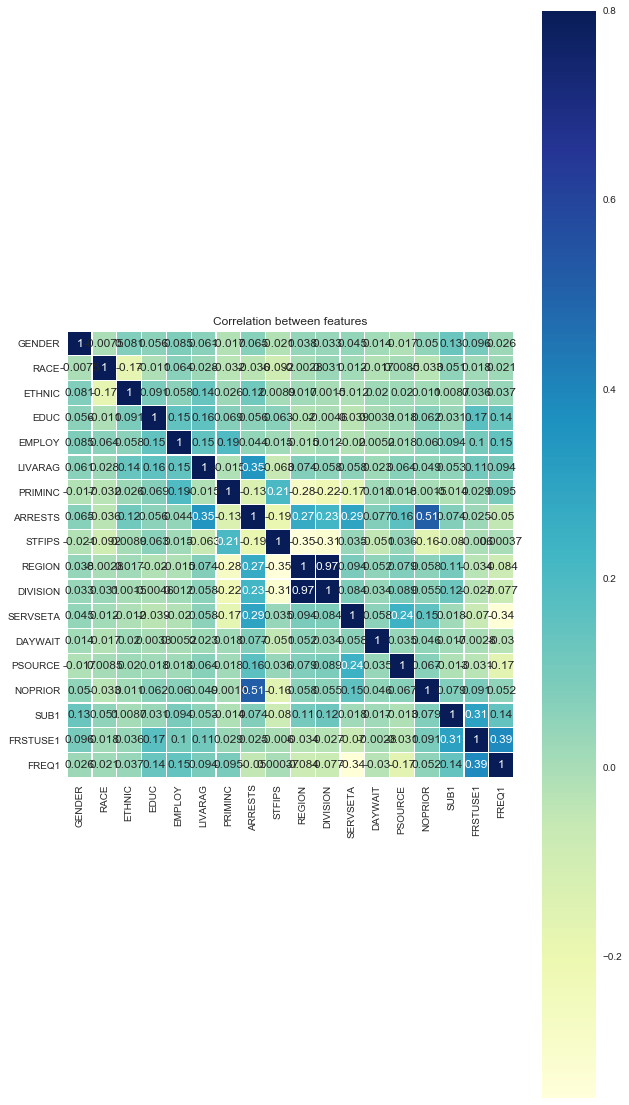

In [4]:
corr=df.loc[:,["GENDER","RACE","ETHNIC","EDUC","EMPLOY","LIVARAG","PRIMINC","ARRESTS","STFIPS","REGION","DIVISION","SERVSETA","DAYWAIT","PSOURCE","NOPRIOR","SUB1","FRSTUSE1","FREQ1"]].corr()#["Survived"]
plt.figure(figsize=(10, 20))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');
plt.show()

In [7]:
#df.RACE.apply(df.value_counts).plot.pie(subplots = True)
#a.apply(pd.value_counts).plot.pie(subplots=True)
slices=df['RACE'].value_counts()
list(slices)

labels=[]
plt.pie(slices,labels=labels,colors=['white', '#0fff00','gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','yellow','blue'],startangle=90,shadow=True,autopct='%1.1f%%')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.legend(labels, loc="best")

plt.show()

ValueError: 'label' must be of length 'x'

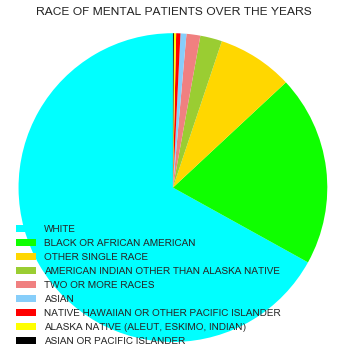

5     6020097
4     1796870
20     713232
2      205719
21     130072
13      55498
23      40447
1       21158
3        8729
Name: RACE, dtype: int64

In [8]:
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = ['WHITE','BLACK OR AFRICAN AMERICAN','OTHER SINGLE RACE','AMERICAN INDIAN OTHER THAN ALASKA NATIVE','TWO OR MORE RACES','ASIAN','NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER','ALASKA NATIVE (ALEUT, ESKIMO, INDIAN)','ASIAN OR PACIFIC ISLANDER']
slices=df['RACE'].value_counts()
slices=slices.drop([-9])
colors = ['cyan', '#0fff00','gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','yellow','black']
patches, texts = plt.pie(slices, colors=colors, startangle=90)
plt.legend(patches, labels,loc = 'best')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.title("RACE OF MENTAL PATIENTS OVER THE YEARS")
plt.show()
slices

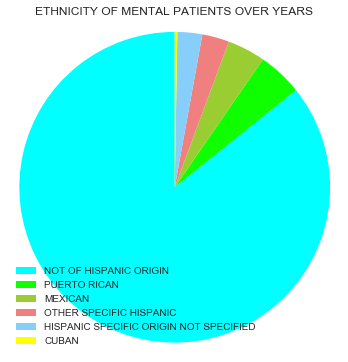

5    7695927
2     417115
1     353561
4     252831
6     231613
3      24144
Name: ETHNIC, dtype: int64

In [9]:
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = ["NOT OF HISPANIC ORIGIN","PUERTO RICAN","MEXICAN","OTHER SPECIFIC HISPANIC","HISPANIC SPECIFIC ORIGIN NOT SPECIFIED","CUBAN"]
slices=df['ETHNIC'].value_counts()
slices=slices.drop([-9])
colors = ['cyan', '#0fff00', 'yellowgreen', 'lightcoral', 'lightskyblue','yellow']
patches, texts = plt.pie(slices, colors=colors, startangle=90)
plt.legend(patches, labels,loc = 'best')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.title("ETHNICITY OF MENTAL PATIENTS OVER YEARS")
plt.show()
slices

In [6]:
df.groupby('AGE')['YEAR'].value_counts()

AGE  YEAR
2    2011     24250
     2010     23000
     2012     21543
     2013     18141
     2014     13296
3    2011    121083
     2010    118587
     2012    102072
     2013     85296
     2014     66393
4    2010    131404
     2011    122781
     2012    109294
     2013     95617
     2014     77431
5    2010    240824
     2011    238856
     2012    227007
     2013    219450
     2014    196077
6    2011    302535
     2010    300575
     2012    292541
     2013    291064
     2014    282261
7    2013    254378
     2012    251768
     2011    251459
     2014    247429
     2010    238315
8    2010    198900
     2011    188603
     2012    179461
     2013    179251
     2014    178193
9    2010    212048
     2011    205616
     2012    187092
     2013    170591
     2014    153728
10   2010    212306
     2011    206415
     2012    188878
     2013    172796
     2014    155762
11   2011    153394
     2012    149456
     2013    146657
     2010    145091
     2014 

In [10]:
import matplotlib
matplotlib.style.use('ggplot')


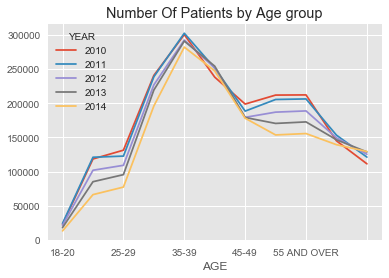

In [11]:
plt.figure()
df.groupby('AGE')['YEAR'].value_counts().unstack().plot()
plt.title('Number Of Patients by Age group')

ax = plt.gca() # grab the current axis
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
ax.set_xticklabels(["12-14","18-20","25-29","35-39","45-49","55 AND OVER"]) 
plt.show()
# set the labels to display at those ticks

In [12]:
import matplotlib.pyplot as plt

ax = plt.gca() # grab the current axis
ax.set_xticks([1,2,3]) # choose which x locations to have ticks
ax.set_xticklabels([1,"key point",2]) # set the labels to display at those ticks

[Text(0,0,u'1'), Text(0,0,u'key point'), Text(0,0,u'2')]

In [26]:
df2 = df[(df[['DAYWAIT']] > 0).all(1)]
df_positive = df[(df[['DAYWAIT']] >= 0).all(1)]
df2 = df2[(df2[['DAYWAIT']] <= 35 ).all(1)]
df2.groupby('YEAR')['DAYWAIT'].value_counts()

YEAR  DAYWAIT
2010  1          87029
      7          32433
      2          31492
      3          24441
      5          24394
      4          19241
      6          18742
      14         17625
      8          13338
      10         12335
      9           8818
      30          8139
      15          8112
      13          7840
      12          7221
      21          6812
      11          5865
      20          5729
      16          4164
      17          3504
      22          3439
      28          3388
      19          3339
      18          3323
      27          2748
      23          2457
      25          2305
      35          2170
      26          2135
      29          2116
                 ...  
2014  4          15430
      6          14314
      14         11889
      8          10178
      10         10132
      9           6620
      13          5477
      15          5417
      12          5266
      30          5260
      21          4935
      11          46

In [143]:
plt.figure()
df3 = df2[(df2[['DAYWAIT']] <= 14 ).all(1)]

df3.groupby('YEAR')['DAYWAIT'].value_counts().unstack().plot()
plt.title('Daywait of Patients by Year (first 14 days)')

ax = plt.gca() # grab the current axis
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["12-14","18-20","25-29","35-39","45-49","55 AND OVER"]) 
plt.show()

KeyError: 'YEAR'

In [124]:
df_mean = df_positive[['STFIPS','DAYWAIT']]

df_mean = df_mean.groupby(['STFIPS'])[['DAYWAIT']].mean()
#df_mean = df_mean.groupby('DAYWAIT').nlargest(5)
df_mean_sorted = df_mean.sort_values(by='DAYWAIT').head(5)
print(df_mean_sorted)
#df_positive.query('STFIPS == 20')['DAYWAIT']
#df_mean


         DAYWAIT
STFIPS          
20      0.000000
48      0.117202
11      0.139497
32      1.132235
2       1.138951
          DAYWAIT
STFIPS           
20       0.000000
48       0.117202
11       0.139497
32       1.132235
2        1.138951
35       1.728612
31       1.736074
8        3.048049
15       3.487458
6        3.622697
1        3.664678
24       4.320276
16       4.519069
28       4.542816
10       5.144471
5        5.154685
25       5.196637
22       5.328757
23       5.757871
34       6.319445
47       7.073553
30       7.624831
49       7.776737
46       7.850968
26       8.094894
72       8.877570
45       8.977435
19       9.056490
17       9.254224
56      10.120492
29      10.150488
42      10.401453
33      11.935428
12      12.313812
38      14.177009
4       19.920988
54      25.113208
39      27.835926


              STATE   DAYWAIT
0            KANSAS  0.000000
1             TEXAS  0.117202
2  DIST OF COLUMBIA  0.139497
3            NEVADA  1.132235
4            ALASKA  1.138951


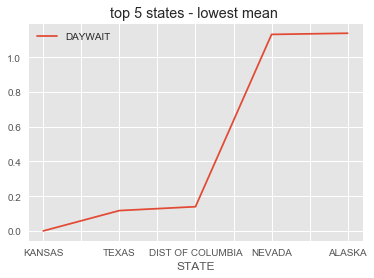

In [142]:
df2=pd.read_csv('../tmp.csv')
print(df2)
df2.dtypes.index
#plt.scatter(df2['STATE'], df2['DAYWAIT'])
df2.plot(x='STATE', y='DAYWAIT')
plt.title("top 5 states - lowest mean ")
plt.show()


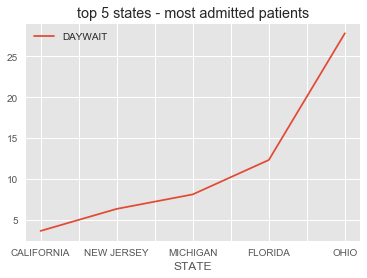

In [126]:
df3 = df_positive['STFIPS'].value_counts()
print(df3.head(5))
print(df_mean.sort_values(by='DAYWAIT'))


6     796382
39    343332
34    323921
12    312646
26    290165
Name: STFIPS, dtype: int64
          DAYWAIT
STFIPS           
20       0.000000
48       0.117202
11       0.139497
32       1.132235
2        1.138951
35       1.728612
31       1.736074
8        3.048049
15       3.487458
6        3.622697
1        3.664678
24       4.320276
16       4.519069
28       4.542816
10       5.144471
5        5.154685
25       5.196637
22       5.328757
23       5.757871
34       6.319445
47       7.073553
30       7.624831
49       7.776737
46       7.850968
26       8.094894
72       8.877570
45       8.977435
19       9.056490
17       9.254224
56      10.120492
29      10.150488
42      10.401453
33      11.935428
12      12.313812
38      14.177009
4       19.920988
54      25.113208
39      27.835926
